In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os


import numpy as np
import math as mat

%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Limpieza de datos

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_J_Practicas/adult.csv")

In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include=["object"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
columnas_con_interrogacion=[col for col in data.columns if (data[col] == '?').any().sum]

for col in columnas_con_interrogacion:
    count = (data[col] == '?').sum()
    print(f"La columna '{col}' tiene {count} valores '?'")

La columna 'age' tiene 0 valores '?'
La columna 'workclass' tiene 1836 valores '?'
La columna 'fnlwgt' tiene 0 valores '?'
La columna 'education' tiene 0 valores '?'
La columna 'education.num' tiene 0 valores '?'
La columna 'marital.status' tiene 0 valores '?'
La columna 'occupation' tiene 1843 valores '?'
La columna 'relationship' tiene 0 valores '?'
La columna 'race' tiene 0 valores '?'
La columna 'sex' tiene 0 valores '?'
La columna 'capital.gain' tiene 0 valores '?'
La columna 'capital.loss' tiene 0 valores '?'
La columna 'hours.per.week' tiene 0 valores '?'
La columna 'native.country' tiene 583 valores '?'
La columna 'income' tiene 0 valores '?'


In [ ]:
df=data[(data['workclass']!="?")&(data['occupation']!="?")&(data['native.country']!="?")].copy(deep=True)
df

In [ ]:
columnas_con_interrogacion=[col for col in data.columns if (df[col] == '?').any().sum]

for col in columnas_con_interrogacion:
    count = (df[col] == '?').sum()
    print(f"La columna '{col}' tiene {count} valores '?'")

La columna 'age' tiene 0 valores '?'
La columna 'workclass' tiene 0 valores '?'
La columna 'fnlwgt' tiene 0 valores '?'
La columna 'education' tiene 0 valores '?'
La columna 'education.num' tiene 0 valores '?'
La columna 'marital.status' tiene 0 valores '?'
La columna 'occupation' tiene 0 valores '?'
La columna 'relationship' tiene 0 valores '?'
La columna 'race' tiene 0 valores '?'
La columna 'sex' tiene 0 valores '?'
La columna 'capital.gain' tiene 0 valores '?'
La columna 'capital.loss' tiene 0 valores '?'
La columna 'hours.per.week' tiene 0 valores '?'
La columna 'native.country' tiene 0 valores '?'
La columna 'income' tiene 0 valores '?'


In [ ]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

In [ ]:
df['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

# Visualizacion

In [ ]:
import matplotlib.pyplot as plt
df['income'].value_counts().plot(kind='bar')
plt.title('Distribución de income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.ylim(0, 25000)
plt.grid(True)
plt.show()


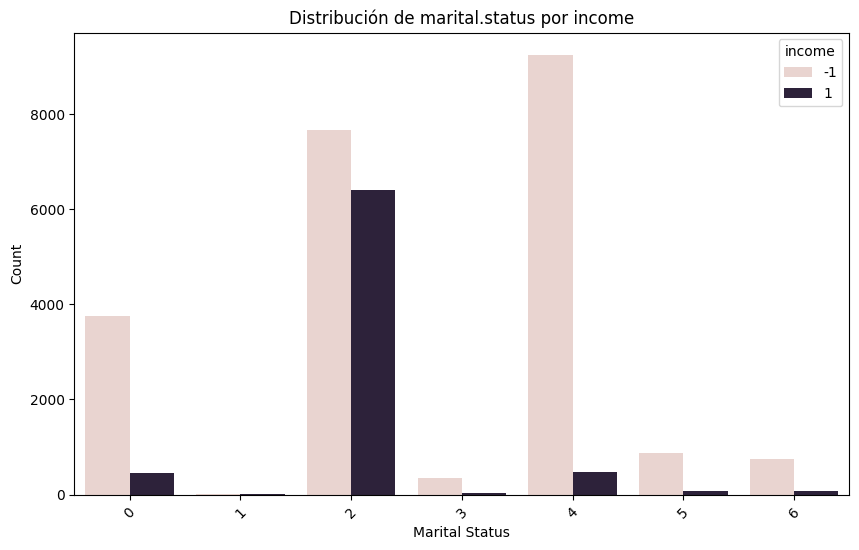

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='marital.status', hue='income')
plt.title('Distribución de marital.status por income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#MaritalStatus

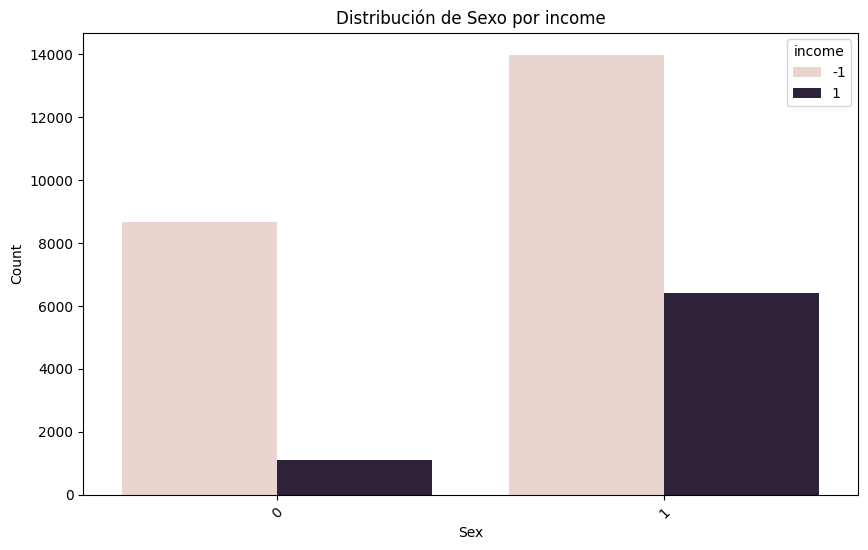

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Distribución de Sexo por income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Sex

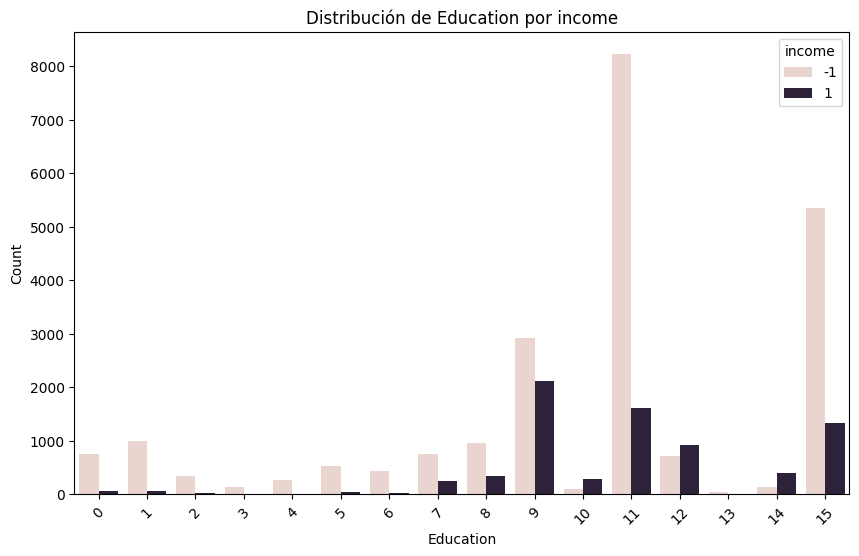

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Distribución de Education por income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Education

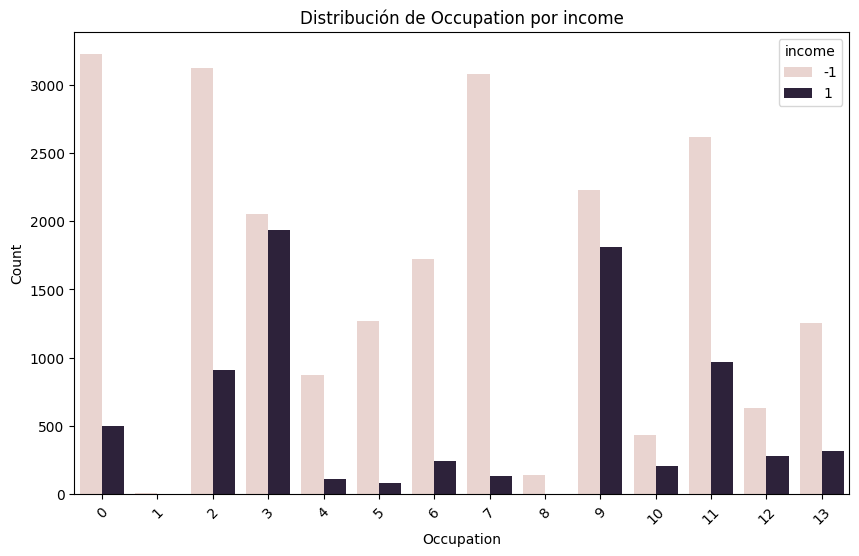

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Distribución de Occupation por income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#occupation

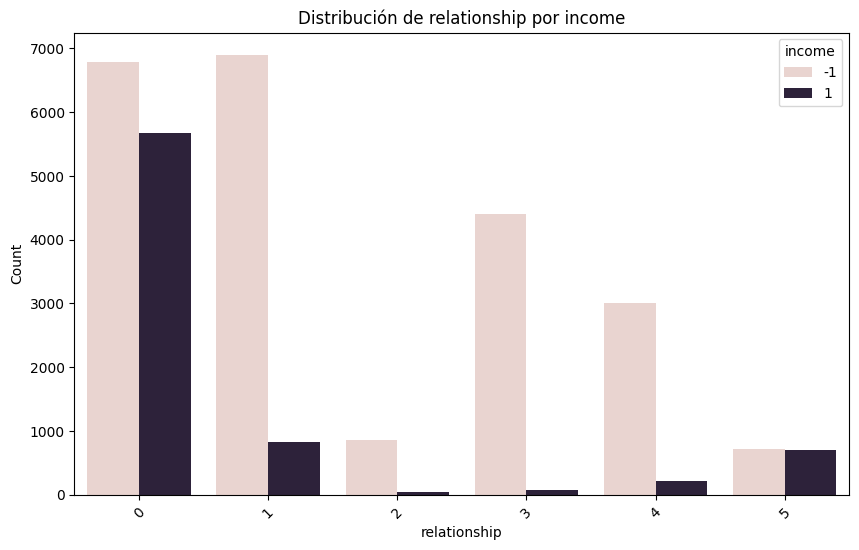

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Distribución de relationship por income')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#relationship

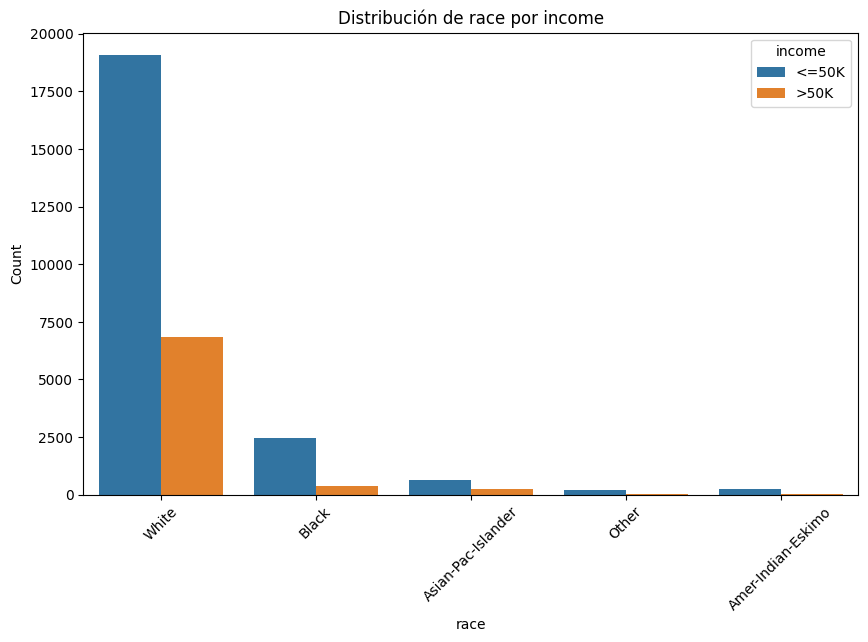

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race', hue='income')
plt.title('Distribución de race por income')
plt.xlabel('race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#race

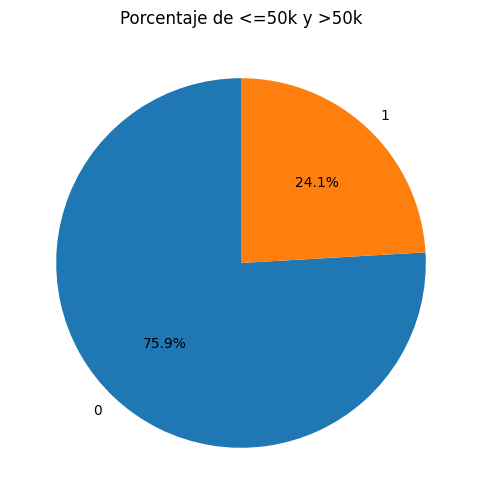

In [ ]:
conteo = data['income'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10,6))
plt.pie(conteo, labels=['0', '1'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de <=50k y >50k')
plt.show()

In [ ]:
sns.distplot(df['age'],kde = False,bins = 30)

In [ ]:
sns.distplot(df['hours.per.week'],kde = False)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['capital.gain'], df['capital.loss'])
plt.title('Comparación de capital.gain vs capital.loss')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

**Capital.gain tiene mayoria de valores en 0**

In [ ]:
correlation = df.select_dtypes(include=[np.number]).corr()

correlation.corr()

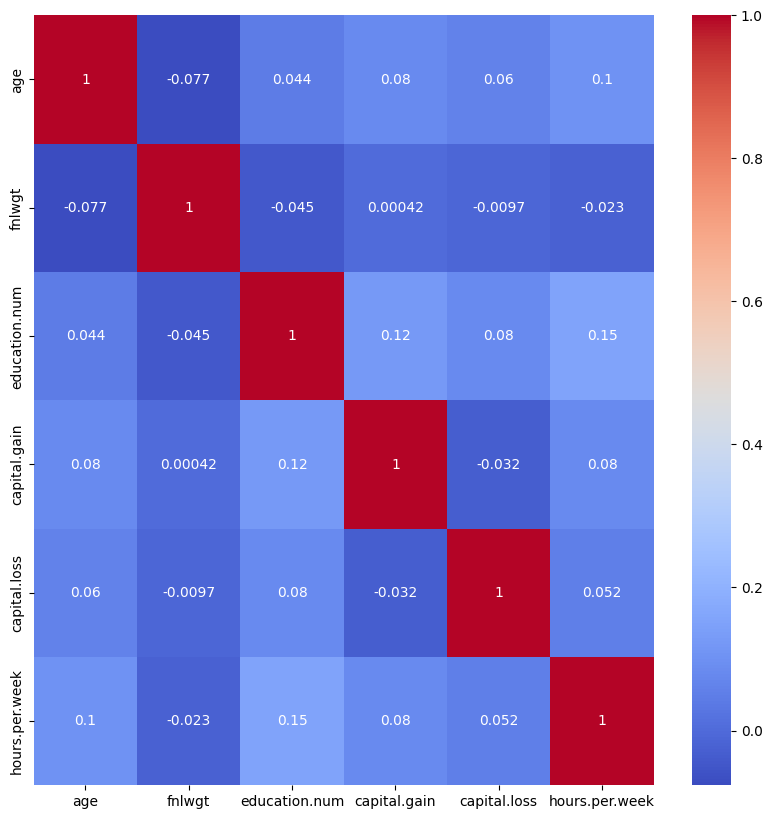

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Remover valores atipicos

In [ ]:
def outL_func(q25,q75):
    return (q75 + 1.5*(q75-q25))

def outR_func(q25,q75):
    return (q25 - 1.5*(q75-q25))

def out_rem(x,outL,outR):
    if x>outR:
        return outR

    elif x<outL:
        return outL
    else :
        return x

**Explicacion del codigo**

outL_func(q25, q75): Esta función calcula el límite superior para los outliers. Toma como argumentos el primer cuartil (q25) y el tercer cuartil (q75) de los datos, y devuelve el valor por encima del cual se consideraría un dato como outlier.

outR_func(q25, q75): Similar a la función anterior, pero calcula el límite inferior para los outliers.

out_rem(x, outL, outR): Esta función se utiliza para reemplazar los outliers en los datos. Toma un valor x y los límites superior e inferior para los outliers (outL y outR, respectivamente). Si x es mayor que outR (límite superior), la función devuelve outR. Si x es menor que outL (límite inferior), la función devuelve outL. Si x está entre outL y outR, la función simplemente devuelve x.

In [ ]:
labels = ['fnlwgt','hours.per.week']
for label in labels :
    q25,q75 = q75, q25 = np.percentile(df[label], [75,25])
    outL = outL_func(q25,q75)
    outR = outR_func(q25,q75)
    df[label]= df[label].apply(lambda row: out_rem(row,outL,outR))

**Expliacion del codigo**

***Para cada label en la lista de labels, hace lo siguiente:***  se utilizan esas columnas porque las demas de numericos no se pueden cambiar ya que definen una categoria de otra columna

Calcula el primer cuartil (q25) y el tercer cuartil (q75) de los datos en la columna correspondiente del DataFrame.

Usa las funciones outL_func(q25,q75) y outR_func(q25,q75) para calcular los límites superior e inferior para los outliers, respectivamente.

Aplica la función out_rem(x, outL, outR) a cada valor en la columna correspondiente del DataFrame. Esta función reemplaza los outliers con el valor del límite correspondiente.

# codificacion de etiquetas

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["income"] = np.where(df["income"] == '<=50K', -1, 1)

In [ ]:
df['education'] = le.fit_transform(df['education'])
df['occupation'] = le.fit_transform(df['occupation'])
df['workclass'] = le.fit_transform(df['workclass'])
df['relationship'] = le.fit_transform(df['relationship'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['sex'] = le.fit_transform(df['sex'])
df['race'] = le.fit_transform(df['race'])
df['native.country'] = le.fit_transform(df['native.country'])
df